# Traitement de la BDNB sur le département du Finistère

[Téléchargement de la BDNB](https://www.data.gouv.fr/fr/datasets/base-de-donnees-nationale-des-batiments/)

# Initialisation et installation de l'environnement de travail

In [ ]:
#Installation de pandas 
!pip install pandas
#Installation de géopandas
!pip install geopandas
#Installation de packages nécessaire à leur utilisation
!pip install gdal-bin python-gdal python3-gdal
!pip install python3-rtree
#Installation de zipfile pour dézipper le fichier BDNB
!pip install zipfile
#Installation de matplotlib
!pip install matplotlib
#Installation de Folium
!pip install folium
# Pour la cartographie thématique
!pip install mapclassify
# Instal contextily
!pip install contextily
# Pour l'affichage d'une échelle cartographique
!pip install matplotlib_scalebar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 76.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement gdal-bin (from versions: none)
ERROR: No matching distribution found for gdal-bin
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement python3-rtree (from versions: none)
ERROR: No matching distribution found for python3-rtree
Looking in indexes: https://pypi.org/simple, https://us-python.pk

In [ ]:
#Importation des packages 
import pandas as pd #Gestion des données
import geopandas as gpd #Gestion des données spatiales
import zipfile as zp #Dézippe les fichiers
import matplotlib.pyplot as plt #Création de graphiques
import folium #Création de cartes interactives 
import contextily as ctx #Fonds de carte
import shapely #Manipulation de géométrie
import mapclassify #Cartographie thématique
from matplotlib_scalebar.scalebar import ScaleBar #Echelle cartographique
import matplotlib.colors as colors

# Import et traitement des jeux de données

## Téléchargement et import des jeux de données

In [ ]:
#Téléchargement des datas depuis data.gouv
!wget https://www.data.gouv.fr/fr/datasets/r/b46c7c3c-5b53-482e-8c88-dea0d9c25682 -O BDNB.zip
#Téléchargement des données de la couche commune de france 
!wget -O communesok.geojson "https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/georef-france-commune-arrondissement-municipal-millesime/exports/geojson?lang=fr&facet=facet(name%3D%22reg_name%22%2C%20disjunctive%3Dtrue)&facet=facet(name%3D%22dep_name%22%2C%20disjunctive%3Dtrue)&facet=facet(name%3D%22arrdep_name%22%2C%20disjunctive%3Dtrue)&facet=facet(name%3D%22ze2020_name%22%2C%20disjunctive%3Dtrue)&facet=facet(name%3D%22bv2012_name%22%2C%20disjunctive%3Dtrue)&facet=facet(name%3D%22epci_name%22%2C%20disjunctive%3Dtrue)&facet=facet(name%3D%22ept_name%22%2C%20disjunctive%3Dtrue)&facet=facet(name%3D%22com_name%22%2C%20disjunctive%3Dtrue)&facet=facet(name%3D%22com_arm_name%22%2C%20disjunctive%3Dtrue)&facet=facet(name%3D%22ze2010_name%22%2C%20disjunctive%3Dtrue)&facet=facet(name%3D%22com_arm_is_mountain_area%22%2C%20disjunctive%3Dtrue)&refine=year%3A%222022%22&timezone=Europe%2FBerlin"

--2023-05-13 21:21:03--  https://www.data.gouv.fr/fr/datasets/r/b46c7c3c-5b53-482e-8c88-dea0d9c25682
Resolving www.data.gouv.fr (www.data.gouv.fr)... 37.59.183.93
Connecting to www.data.gouv.fr (www.data.gouv.fr)|37.59.183.93|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://open-data.s3.fr-par.scw.cloud/bdnb_millesime_2022-10-c/millesime_2022-10-c_dep29/open_data_millesime_2022-10-c_dep29_csv.zip [following]
--2023-05-13 21:21:03--  https://open-data.s3.fr-par.scw.cloud/bdnb_millesime_2022-10-c/millesime_2022-10-c_dep29/open_data_millesime_2022-10-c_dep29_csv.zip
Resolving open-data.s3.fr-par.scw.cloud (open-data.s3.fr-par.scw.cloud)... 51.159.62.6, 51.159.62.7, 51.159.62.8, ...
Connecting to open-data.s3.fr-par.scw.cloud (open-data.s3.fr-par.scw.cloud)|51.159.62.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 328161747 (313M) [application/zip]
Saving to: ‘BDNB.zip’

BDNB.zip            100%[===================>] 312.96M

In [ ]:
#Dézipper le fichier des bâtiments
with zp.ZipFile('BDNB.zip','r') as zip_ref :
  zip_ref.extractall('/content/')

In [ ]:
#Import des fichiers de base
bat = gpd.read_file('/content/csv/batiment_groupe.csv')
bat.head(3)

geom_groupe  \
0  MULTIPOLYGON (((190926.859324264 6863766.06803...   
1  MULTIPOLYGON (((183743.326672619 6775104.89602...   
2  MULTIPOLYGON (((205107.317760053 6771065.23343...   

               batiment_groupe_id code_departement_insee  s_geom_groupe  \
0  29023000AD0624_c1fda7c0e9f1269                     29            NaN   
1  29039000BS0161_a689edd50261463                     29            NaN   
2  290050000A0308_321d8682b42e28d                     29            NaN   

   code_iris code_commune_insee libelle_commune_insee code_epci_insee  \
0                                                                       
1                                                                       
2  290050000              29005                  Baye       242900694   

   contient_fictive_geom_groupe  \
0                          True   
1                          True   
2                          True   

                                            geometry  
0  MULTIPOLYGON (((190926.859 6863766.068, 190933...  
1  MULTIPOLYGON (((183743.327 6775104.896, 183747...  
2  MULTIPOLYGON (((205107.318 6771065.233, 205109...

`On applique ici une fonction particulière car les valeurs étaient entourées par des crochets. Cela se produit quand les données sont stockées dans des tableaux (ou des listes en Python).`

In [ ]:
#Résoudre un problème sur les valeurs dans les lignes qui sont entourées de crochets
def flatten_list(l):
    """
    Transforme une liste de valeurs en une valeur scalaire
    """
    if isinstance(l, list):
        return l[0]
    else:
        return l

# Charger les données depuis un fichier GeoJSON
Communes= gpd.read_file("communesok.geojson", encoding='utf-8')

# Appliquer la fonction à chaque colonne pour aplatir les tableaux
for col in Communes.columns:
    Communes[col] = Communes[col].apply(flatten_list)

In [ ]:
# Ne garder que les champs intéressants 
CommunesOK = Communes[["year", "reg_code", "reg_name", "dep_code", "dep_name", "com_code", "com_name", "geo_point_2d", "geometry"]]
CommunesOK.head(2)

year reg_code         reg_name dep_code dep_name com_code  \
0  2022       32  Hauts-de-France       02    Aisne    02662   
1  2022       32  Hauts-de-France       02    Aisne    02675   

            com_name                                       geo_point_2d  \
0  Rozet-Saint-Albin  {'lon': 3.297582999317817, 'lat': 49.198064925...   
1       Sainte-Croix  {'lon': 3.7804115945476187, 'lat': 49.48003071...   

                                            geometry  
0  POLYGON ((3.32120 49.21129, 3.32078 49.21116, ...  
1  POLYGON ((3.78147 49.49013, 3.77671 49.49006, ...

In [ ]:
#Filter les commune du 29
Communes29 = CommunesOK[CommunesOK['dep_code'] == '29']
Communes29.head(2)

year reg_code  reg_name dep_code   dep_name com_code     com_name  \
202  2022       53  Bretagne       29  Finistère    29011       Bohars   
203  2022       53  Bretagne       29  Finistère    29083  Île-de-Sein   

                                          geo_point_2d  \
202  {'lon': -4.521860622000237, 'lat': 48.43135976...   
203  {'lon': -4.857150705519812, 'lat': 48.03827134...   

                                              geometry  
202  POLYGON ((-4.53960 48.43522, -4.53796 48.43388...  
203  MULTIPOLYGON (((-4.83813 48.03169, -4.83920 48...

## Taux de remplissage

In [ ]:
#Importer les fichiers utiles
#si import en format gpd.read_file temps de traitement extrèmement long mais import des géométries
argiles = pd.read_csv('/content/csv/batiment_groupe_argiles.csv')
bdtopo = pd.read_csv('/content/csv/batiment_groupe_bdtopo_bat.csv')
elec = pd.read_csv('/content/csv/batiment_groupe_dle_elec_2020.csv')
gaz = pd.read_csv('/content/csv/batiment_groupe_dle_gaz_2020.csv')
dpe = pd.read_csv('/content/csv/batiment_groupe_dpe.csv')
historique = pd.read_csv('/content/csv/batiment_groupe_merimee.csv')
radon = pd.read_csv('/content/csv/batiment_groupe_radon.csv')
rnc = pd.read_csv('/content/csv/batiment_groupe_rnc.csv')
bat_construction = gpd.read_file('/content/csv/batiment_construction.csv')
proprio = pd.read_csv('/content/csv/proprietaire.csv')
bat_proprio = pd.read_csv('/content/csv/rel_batiment_groupe_proprietaire.csv')

Boucle pour calculer le taux de remplissage des colonnes
et conserver uniquement les colonnes avec un taux de remplissage > 95%

In [ ]:
# Créer une liste de DataFrames
df_list = [(bat, "bat"), (argiles,"argiles"), (bdtopo,"bdtopo"), (elec,"elec"), (gaz,"gaz"), (dpe,"dpe"), (historique,"historique"), (radon,"radon"), (rnc,"rnc"), (bat_construction,"bat_construction"), (proprio,"proprio"), (bat_proprio,"bat_proprio")]

# Pour chaque DataFrame dans la liste, calculer le taux de remplissage de chaque colonne
for df, nom_df in df_list:
    # Calculer le taux de remplissage de chaque colonne
    fill_rates = (df.count() / len(df))*100
    # Afficher les résultats avec le nom du DataFrame
    print(f"Taux de remplissage pour la table {nom_df}:")
    print(fill_rates)

Taux de remplissage pour la table bat:
geom_groupe                     100.00000
batiment_groupe_id              100.00000
code_departement_insee          100.00000
s_geom_groupe                    97.92459
code_iris                       100.00000
code_commune_insee              100.00000
libelle_commune_insee           100.00000
code_epci_insee                 100.00000
contient_fictive_geom_groupe    100.00000
geometry                        100.00000
dtype: float64
Taux de remplissage pour la table argiles:
batiment_groupe_id        100.0
code_departement_insee    100.0
alea                      100.0
dtype: float64
Taux de remplissage pour la table bdtopo:
batiment_groupe_id        100.000000
code_departement_insee    100.000000
l_nature                   98.525604
l_usage_1                  98.525604
l_usage_2                  13.361963
l_etat                     98.525604
hauteur_mean              100.000000
altitude_sol_mean          96.315165
dtype: float64
Taux de remplissage

In [ ]:
# Créer un dictionnaire pour stocker les nouveaux DataFrames et le nombre de colonnes supprimées pour chaque DataFrame
df_filled = {}
removed_cols = {}

# Pour chaque DataFrame dans la liste, sélectionner les colonnes ayant un taux de remplissage supérieur à 95%
for df, nom_df in df_list:
    # Calculer le taux de remplissage de chaque colonne
    fill_rates = (df.count() / len(df))*100
    # Sélectionner les colonnes ayant un taux de remplissage supérieur à 95%
    cols_to_keep = fill_rates[fill_rates >= 95].index
    # Calculer le nombre de colonnes supprimées
    num_removed_cols = len(df.columns) - len(cols_to_keep)
    # Créer un nouveau DataFrame avec les colonnes sélectionnées
    df_new = df.loc[:, cols_to_keep]
    # Ajouter le nouveau DataFrame et le nombre de colonnes supprimées au dictionnaire df_filled
    df_filled[nom_df] = df_new
    removed_cols[nom_df] = num_removed_cols

# Afficher les DataFrames résultants et le nombre de colonnes supprimées pour chaque DataFrame
for nom_df, df in df_filled.items():
    print(f"DataFrame {nom_df} :")
    print(f"{removed_cols[nom_df]} colonne(s) ont été supprimée(s).")

DataFrame bat :
0 colonne(s) ont été supprimée(s).
DataFrame argiles :
0 colonne(s) ont été supprimée(s).
DataFrame bdtopo :
1 colonne(s) ont été supprimée(s).
DataFrame elec :
2 colonne(s) ont été supprimée(s).
DataFrame gaz :
2 colonne(s) ont été supprimée(s).
DataFrame dpe :
8 colonne(s) ont été supprimée(s).
DataFrame historique :
0 colonne(s) ont été supprimée(s).
DataFrame radon :
0 colonne(s) ont été supprimée(s).
DataFrame rnc :
2 colonne(s) ont été supprimée(s).
DataFrame bat_construction :
0 colonne(s) ont été supprimée(s).
DataFrame proprio :
0 colonne(s) ont été supprimée(s).
DataFrame bat_proprio :
0 colonne(s) ont été supprimée(s).


# Graphique des propriétaires moraux 

In [ ]:
#Import du fichier trié
proprio = df_filled['proprio']
proprio_bat = df_filled['bat_proprio']

In [ ]:
#Jointure des tables
Etape1= proprio_bat.merge(proprio[['personne_id', 'denomination']], left_on='personne_id', right_on='personne_id')
proprio_ok = bat.merge(Etape1[['batiment_groupe_id','personne_id', 'denomination']], left_on='batiment_groupe_id', right_on='batiment_groupe_id')
proprio_ok.head(2)

geom_groupe  \
0  MULTIPOLYGON (((183743.326672619 6775104.89602...   
1  MULTIPOLYGON (((183743.326672619 6775104.89602...   

               batiment_groupe_id code_departement_insee  s_geom_groupe  \
0  29039000BS0161_a689edd50261463                     29            NaN   
1  29039000BS0161_a689edd50261463                     29            NaN   

  code_iris code_commune_insee libelle_commune_insee code_epci_insee  \
0                                                                      
1                                                                      

   contient_fictive_geom_groupe  \
0                          True   
1                          True   

                                            geometry personne_id  \
0  MULTIPOLYGON (((183743.327 6775104.896, 183747...    29PBFM9S   
1  MULTIPOLYGON (((183743.327 6775104.896, 183747...    29PBCVKM   

                       denomination  
0  SA D'HLM  AIGUILLON CONSTRUCTION  
1             COMMUNE DE CONCARNEAU

In [ ]:
# vérifier si proprio_ok est un GeoDataFrame
if isinstance(proprio_ok, gpd.GeoDataFrame):
    print("proprio_ok est un GeoDataFrame")
else:
    print("proprio_ok est un DataFrame standard")

proprio_ok est un GeoDataFrame


Création d'un graphique sur les propriétaires moraux

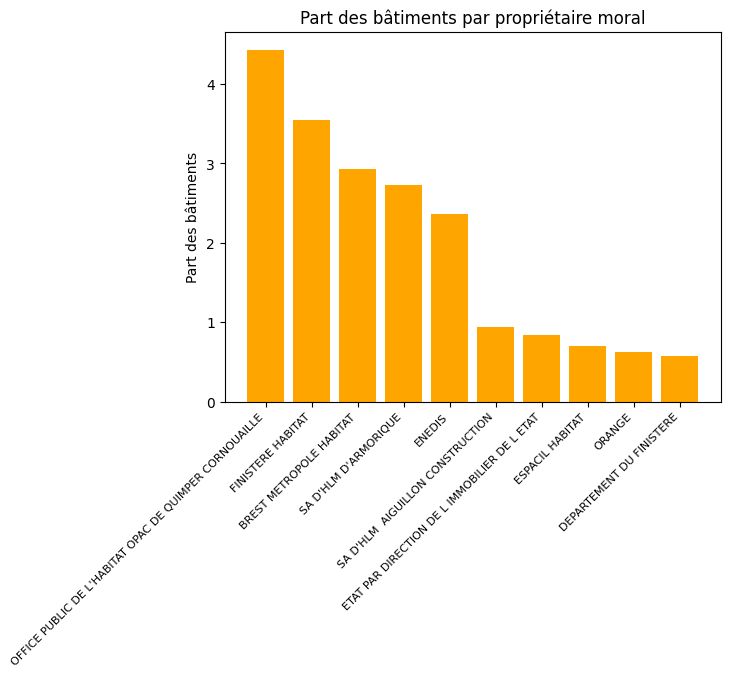

In [ ]:
# Comptage du nombre de lignes pour chaque catégorie
nb = proprio_ok['denomination'].value_counts()
nb_2 = ((nb/nb.sum())*100)

# Sélection des 20 premières valeurs
nb_ok = nb_2[:10]

# création de l'histogramme
plt.bar(nb_ok.index, nb_ok.values, color = 'orange')

# ajouter un titre et des labels d'axes
plt.title('Part des bâtiments par propriétaire moral')
plt.ylabel('Part des bâtiments')
plt.xticks(fontsize=8,rotation=45, ha='right')

# afficher l'histogramme
plt.show()

# Cartes des risques

## Risque du radon

In [ ]:
#Import du fichier trié
radon = df_filled['radon']
radon.head(1)

batiment_groupe_id  code_departement_insee  alea
0  29001000ZV0141_8d0ec4dffbdb94e                      29  Fort

In [ ]:
#Jointure des tables
radon_ok = bat.merge(radon[['batiment_groupe_id','alea']], left_on='batiment_groupe_id', right_on='batiment_groupe_id')

radon_ok.head(1)

geom_groupe  \
0  MULTIPOLYGON (((205107.317760053 6771065.23343...   

               batiment_groupe_id code_departement_insee  s_geom_groupe  \
0  290050000A0308_321d8682b42e28d                     29            NaN   

   code_iris code_commune_insee libelle_commune_insee code_epci_insee  \
0  290050000              29005                  Baye       242900694   

   contient_fictive_geom_groupe  \
0                          True   

                                            geometry  alea  
0  MULTIPOLYGON (((205107.318 6771065.233, 205109...  Fort

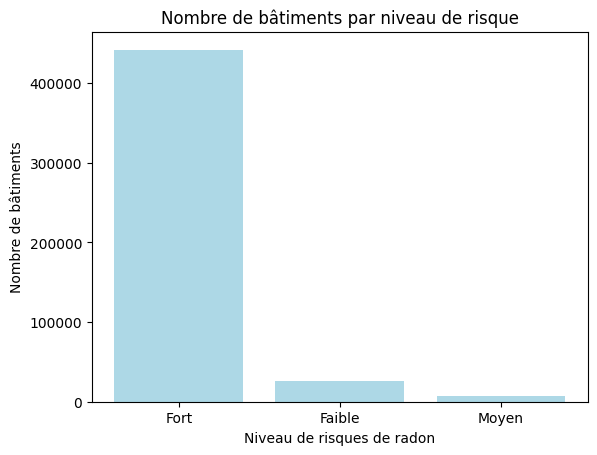

In [ ]:
#Graphique des batiments par niveau de risques au radon sur le 29
# Comptage du nombre de lignes pour chaque catégorie
nb_radon = radon_ok['alea'].value_counts()

#Création du graphique
plt.bar(nb_radon.index, nb_radon.values, color = 'lightblue')
plt.title('Nombre de bâtiments par niveau de risque')
plt.xlabel('Niveau de risques de radon')
plt.ylabel('Nombre de bâtiments')
plt.show()

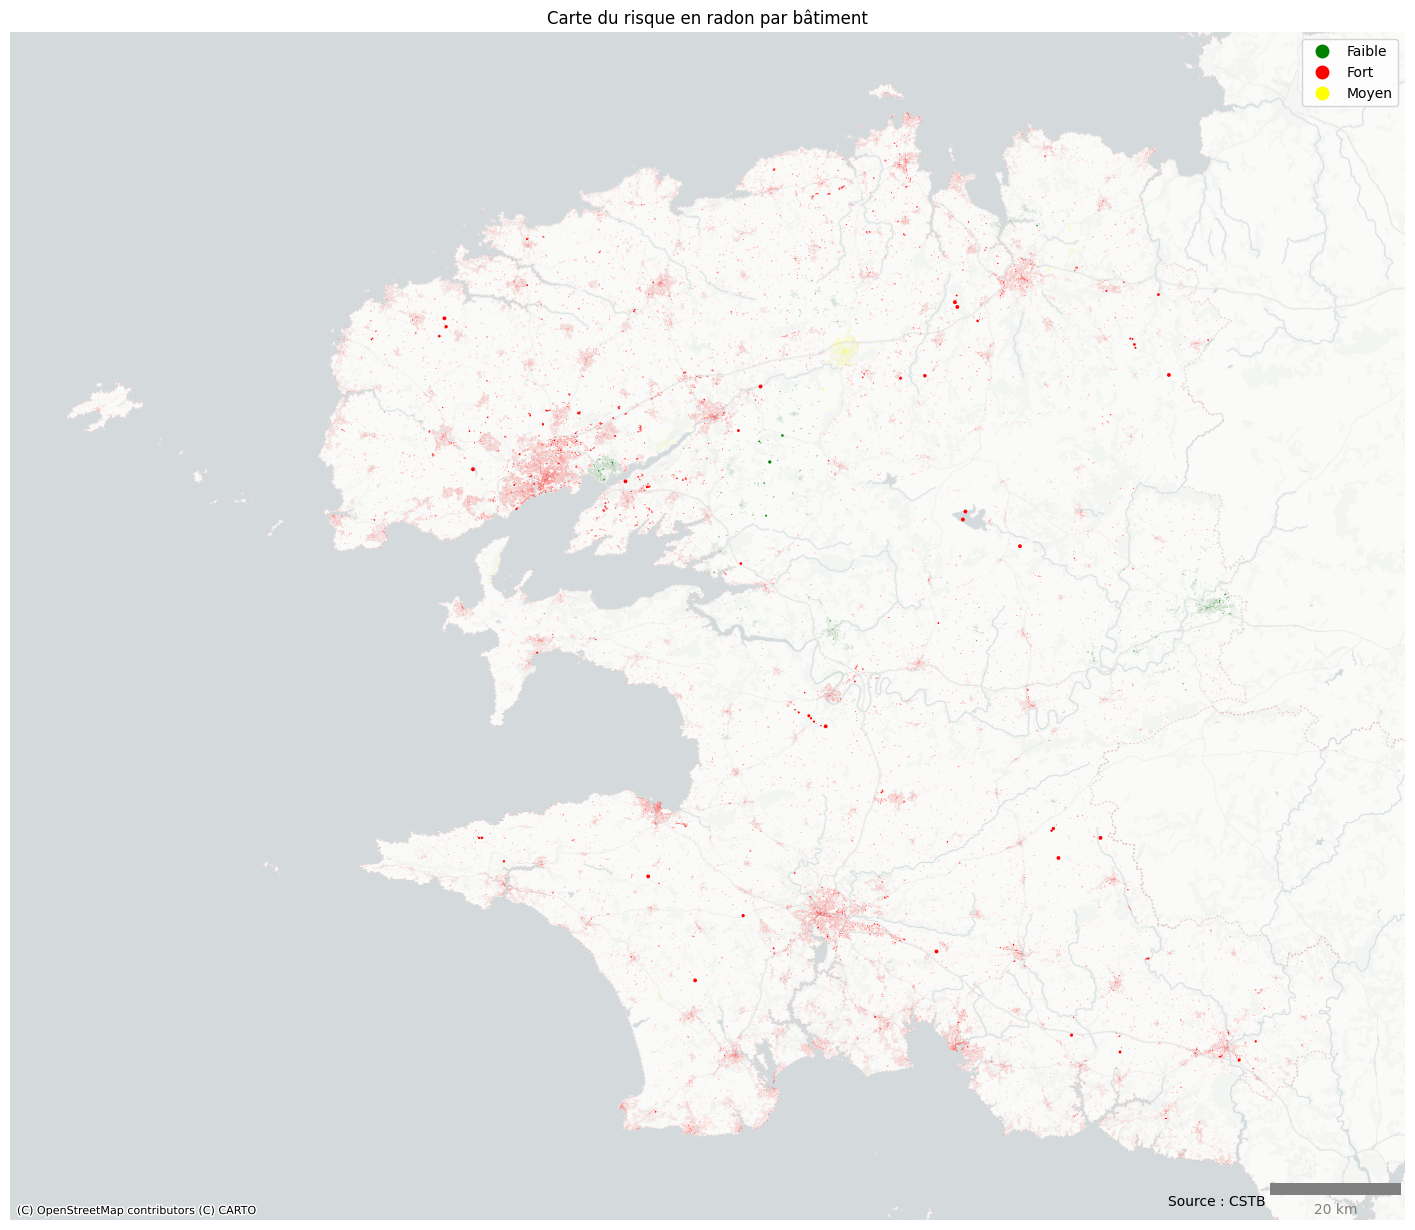

In [ ]:
#Carte du risque radon
#Création du liste de couleur pour la cartographie
custom_colors = {
    'Faible': 'green',
    'Fort': 'red',
    'Moyen': 'yellow'
}
# Création de la carte de couleurs
cmap_custom = colors.ListedColormap(list(custom_colors.values()))

#Création de la carte
ax = radon_ok.to_crs('EPSG:3857').plot(figsize = (18,18), column='alea', cmap=cmap_custom, legend=True)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels)
#Enlève les axes 
ax.axis("off")
# Ajout d'un titre
plt.title('Carte du risque en radon par bâtiment')
ax.text(0.90, 0.01, 'Source : CSTB', verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, color='black', fontsize=10)
ax.add_artist(ScaleBar(1, length_fraction=0.1, location = "lower right", box_alpha=0, color="grey"))
plt.show()

## Risque de l'argiles
Initéressante pour le 29 car tout le département est en risque faible

In [ ]:
#Import du fichier trié
argiles = df_filled['argiles']
argiles.head(1)

In [ ]:
#Jointure des tables
argiles_ok = bat.merge(argiles[['batiment_groupe_id','alea']], left_on='batiment_groupe_id', right_on='batiment_groupe_id')

argiles_ok.head(1)

In [ ]:
#Graphique des batiments par niveau de risque à l'argile sur le 29
# Comptage du nombre de lignes pour chaque catégorie
nb_argiles = argiles_ok['alea'].value_counts()

#Création du graphique
plt.bar(nb_argiles.index, nb_argiles.values, color = 'darkviolet')
plt.title('Nombre de bâtiments par niveau de risque')
plt.xlabel("Niveau de risques d'argiles")
plt.ylabel('Nombre de bâtiments')
plt.show()

In [ ]:
#Carte du risque argiles
#Inintéressante ici car tout le département est en faible
#Création du liste de couleur pour la cartographie
custom_colors = {
    'Faible': 'green',
    'Fort': 'red',
    'Moyen': 'yellow'
}
# Création de la carte de couleurs
cmap_custom = colors.ListedColormap(list(custom_colors.values()))


ax = argiles_ok.to_crs('EPSG:3857').plot(figsize = (18,18), column='alea', cmap=cmap_custom, legend=True)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels)

#Enlève les axes 
ax.axis("off")

# Ajout d'un titre
plt.title('Carte du risque en argiles par bâtiment')

ax.text(0.90, 0.01, 'Source : CSTB', verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, color='black', fontsize=10)
ax.add_artist(ScaleBar(1, length_fraction=0.1, location = "lower right", box_alpha=0, color="grey"))
plt.show()

# Carte des dpe et gaphiques 

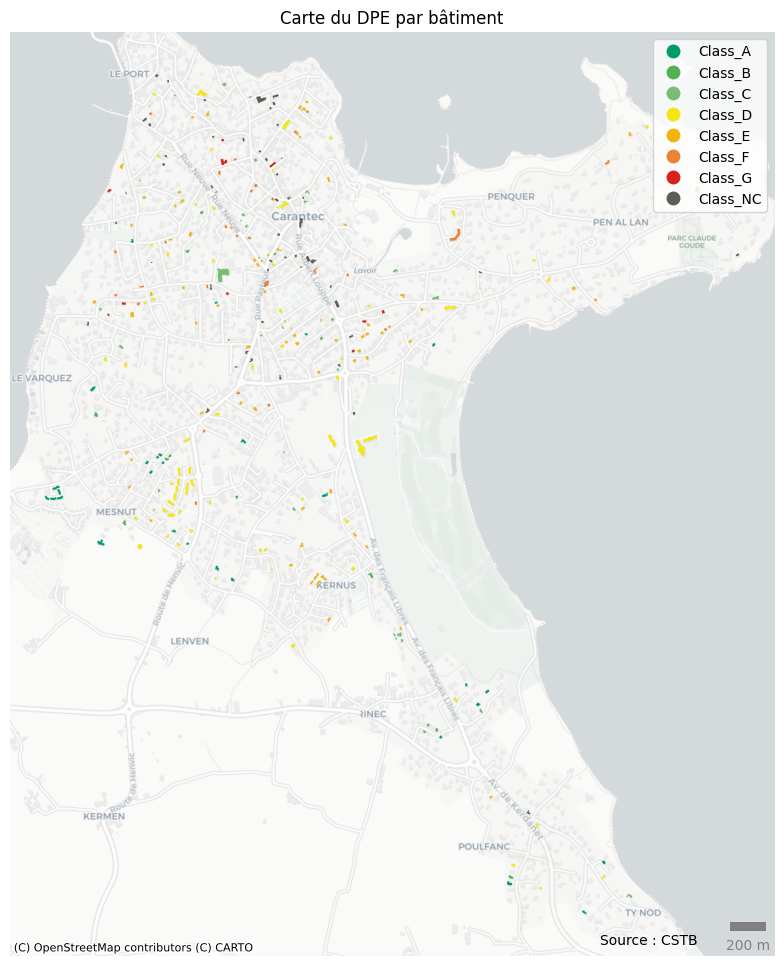

In [ ]:
# Trouver la colonne avec la valeur maximale pour chaque ligne qui correspondent aux DPE
max_cols = dpe[['nb_classe_ener_a', 'nb_classe_ener_b', 'nb_classe_ener_c', 'nb_classe_ener_c', 'nb_classe_ener_d', 'nb_classe_ener_e', 'nb_classe_ener_f', 'nb_classe_ener_g','nb_classe_ener_nc']].idxmax(axis=1)

# Renommer les valeurs dans la colonne "class_bat"
max_cols = max_cols.replace({'nb_classe_ener_a': 'Class_A', 'nb_classe_ener_b': 'Class_B', 'nb_classe_ener_c': 'Class_C', 'nb_classe_ener_d': 'Class_D', 'nb_classe_ener_e': 'Class_E', 'nb_classe_ener_f': 'Class_F', 'nb_classe_ener_g': 'Class_G', 'nb_classe_ener_nc': 'Class_NC'})

# Ajouter la colonne "class_bat" au dataframe
dpe['class_bat'] = max_cols

# Jointure des deux dataframes sur le champ "batiment_groupe_id"
bat_dpe = pd.merge(bat, dpe[['batiment_groupe_id', 'class_bat']], on='batiment_groupe_id', how='left')

# Filtre sur une commune
bat_dpe_com = bat_dpe[(bat_dpe['code_commune_insee'] == '29023')]

# Création du geodataframe "bat_dpe_com" avec les colonnes de "bat" et la colonne "class_bat" de "dpe_ok"
bat_dpe_com = gpd.GeoDataFrame(bat_dpe_com)

# Définition des couleurs personnalisées normalisées
custom_colors = {
    'Class_A': '#009c6d',
    'Class_B': '#52b153',
    'Class_C': '#78bd76',
    'Class_D': '#f4e70f',
    'Class_E': '#f0b50f',
    'Class_F': '#eb8235',
    'Class_G': '#d7221f',
    'Class_NC': '#5C5D58'
}

# Création de la carte de couleurs
cmap_custom = colors.ListedColormap(list(custom_colors.values()))

# Affichage de la carte avec les couleurs personnalisées
bx =bat_dpe_com.to_crs('EPSG:3857').plot(figsize = (12,12), column='class_bat', cmap=cmap_custom, legend=True)
ctx.add_basemap(bx, source=ctx.providers.CartoDB.Positron)
#Enlève les axes 
bx.axis("off")
# Ajout d'un titre
plt.title('Carte du DPE par bâtiment')
bx.text(0.90, 0.01, 'Source : CSTB', verticalalignment='bottom', horizontalalignment='right',
        transform=bx.transAxes, color='black', fontsize=10)
bx.add_artist(ScaleBar(1, length_fraction=0.1, location = "lower right", box_alpha=0, color="grey"))
# Affichage de la carte
plt.show()

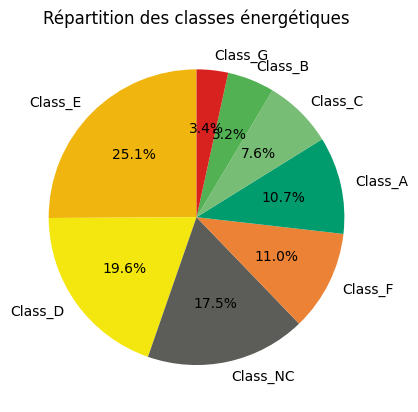

In [ ]:
# Comptage des occurrences de chaque classe énergétique
dpe_counts = bat_dpe_com['class_bat'].value_counts()

# Tri des classes énergétiques par ordre de grandeur
dpe_counts = dpe_counts.sort_values(ascending=False)

# Création d'une liste de couleurs triée dans le même ordre que les classes énergétiques
colors_sorted = [custom_colors[c] for c in dpe_counts.index]

# Création du diagramme circulaire avec les couleurs personnalisées triées
fig, ax = plt.subplots()
ax.pie(dpe_counts, labels=dpe_counts.index, autopct='%1.1f%%', startangle=90, colors=colors_sorted)

# Ajout d'un titre
ax.set_title('Répartition des classes énergétiques')

# Affichage du diagramme
plt.show()

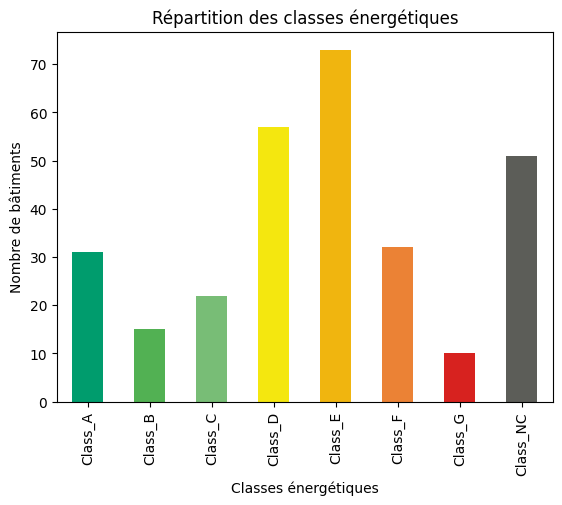

In [ ]:
# Tri des classes énergétiques par ordre alphabétique
dpe_counts2 = dpe_counts.reindex(sorted(dpe_counts.index))

# Tri des valeurs par ordre alphabétique des classes
dpe_counts = dpe_counts.sort_index()

# Création de l'histogramme avec les couleurs personnalisées triées
ax = dpe_counts.plot(kind='bar', color=[custom_colors[c] for c in dpe_counts.index])

# Définition des étiquettes des axes et du titre
ax.set_xlabel('Classes énergétiques')
ax.set_ylabel('Nombre de bâtiments')
ax.set_title('Répartition des classes énergétiques')

# Affichage de l'histogramme
plt.show()

# Carte des consommations totales moyennes en elec et gaz

## Consommations totales moyennes en électricité

In [ ]:
#Import du fichier 
elec_ok = df_filled['elec']
elec_ok.head(2)

batiment_groupe_id  code_departement_insee  nb_pdl_res  \
0  29019000AD0111_1c3b328787acd1b                      29        41.0   
1  29003000AI0309_6bbd0dc005c0e0d                      29        10.0   

   nb_pdl_pro  nb_pdl_tot  conso_res  conso_pro  conso_tot  conso_tot_par_pdl  
0         0.0        41.0    68502.4        0.0    68502.4            1670.79  
1         0.0        10.0    47215.7        0.0    47215.7            4721.57

In [ ]:
# Faire la jointure des tables bat et dpe en utilisant le champ batiment_groupe_id
elec_bat = bat.merge(elec_ok[['conso_tot', 'batiment_groupe_id']],
                    on='batiment_groupe_id')

In [ ]:
# Calculer les moyennes par commune
elec_2 = elec_bat.groupby('code_commune_insee')[['conso_tot']].mean()

In [ ]:
#Joindre les moyennes calculées à la couche commune
elec_f = pd.merge(elec_2, Communes29, left_on='code_commune_insee', right_on='com_code', how='inner')
elec_f.head(2)

conso_tot  year reg_code  reg_name dep_code   dep_name com_code  \
0   38885.300000  2022       53  Bretagne       29  Finistère    29002   
1  117574.723846  2022       53  Bretagne       29  Finistère    29003   

   com_name                                       geo_point_2d  \
0    Arzano  {'lon': -3.442755410196717, 'lat': 47.89317340...   
1  Audierne  {'lon': -4.56142846860011, 'lat': 48.027734531...   

                                            geometry  
0  POLYGON ((-3.39817 47.86321, -3.40010 47.86423...  
1  POLYGON ((-4.56468 48.05535, -4.56471 48.05517...

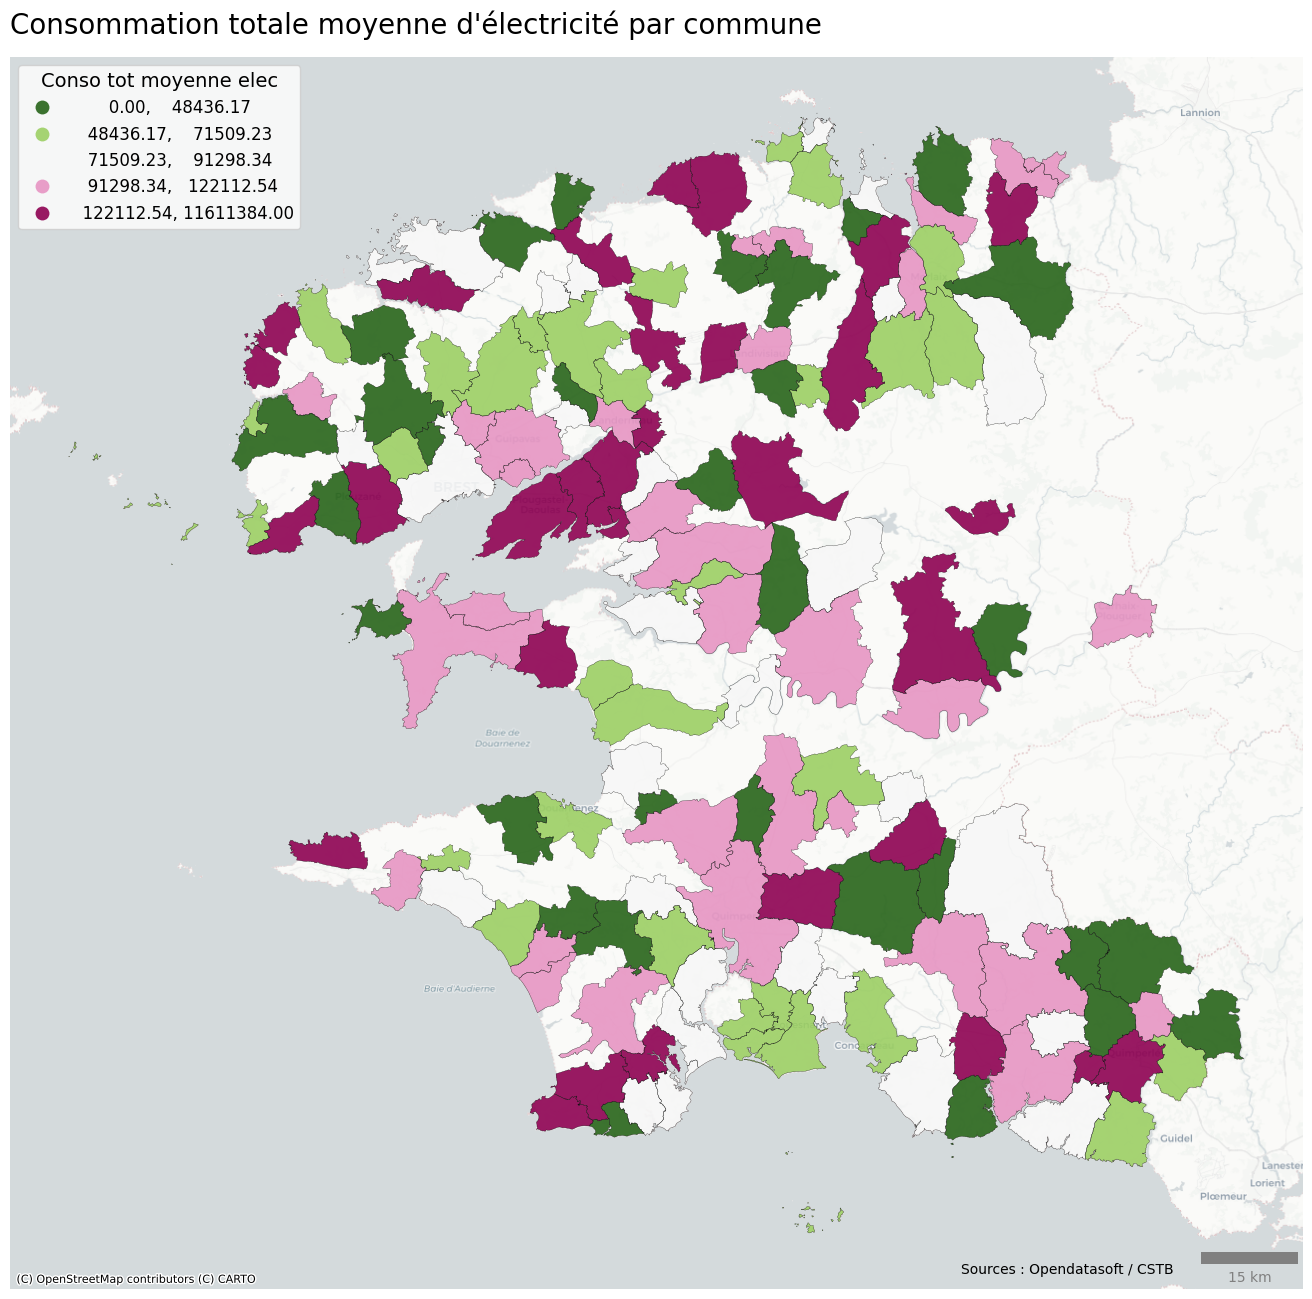

In [ ]:
#Transformation du dataframe en geodataframe
elec_f = gpd.GeoDataFrame(elec_f, geometry='geometry')

# Mise en place de la carte de la conso moyenne d'électricité
fig, ax = plt.subplots(figsize=(18,16))

elec_f.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.2, color = 'black')
elec_f.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.6, column='conso_tot', cmap='PiYG_r', scheme='quantiles', alpha=0.9, 
                                    legend=True, legend_kwds={'title': "Conso tot moyenne elec", 'loc': 'upper left', 'title_fontsize':14, 'fontsize':12})
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

ax.axis("off")
plt.title('Consommation totale moyenne d\'électricité par commune', loc='left', fontsize=20)
ax.text(0.90, 0.01, 'Sources : Opendatasoft / CSTB', verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, color='black', fontsize=10)
ax.add_artist(ScaleBar(1, length_fraction=0.1, location = "lower right", box_alpha=0, color="grey"))

plt.show()

## Consommations totales moyennes en gaz

In [ ]:
#Import du fichier 
gaz_ok = df_filled['gaz']
gaz_ok.head(2)

batiment_groupe_id  code_departement_insee  nb_pdl_res  \
0  29019000AD0135_41fa35822747250                      29         0.0   
1  29019000CD0675_399a9b0793a1f99                      29        10.0   

   nb_pdl_pro  nb_pdl_tot  conso_res  conso_pro  conso_tot  conso_tot_par_pdl  
0         0.0        3.08        0.0        0.0    1133.05            367.873  
1         0.0       10.00    52633.4        0.0   52633.40           5263.340

In [ ]:
# Faire la jointure des tables bat et dpe en utilisant le champ batiment_groupe_id
gaz_bat = bat.merge(gaz_ok[['conso_tot', 'batiment_groupe_id']],
                    on='batiment_groupe_id')

In [ ]:
# Calculer les moyennes par commune
gaz_2 = gaz_bat.groupby('code_commune_insee')[['conso_tot']].mean()

In [ ]:
#Joindre les moyennes calculées à la couche commune
gaz_f = pd.merge(gaz_2, Communes29, left_on='code_commune_insee', right_on='com_code', how='inner')
gaz_f.head(2)

conso_tot  year reg_code  reg_name dep_code   dep_name com_code  \
0  109634.766667  2022       53  Bretagne       29  Finistère    29003   
1  194619.800000  2022       53  Bretagne       29  Finistère    29006   

   com_name                                       geo_point_2d  \
0  Audierne  {'lon': -4.56142846860011, 'lat': 48.027734531...   
1   Bénodet  {'lon': -4.076058665841089, 'lat': 47.87841853...   

                                            geometry  
0  POLYGON ((-4.56468 48.05535, -4.56471 48.05517...  
1  POLYGON ((-4.10572 47.88085, -4.10636 47.88120...

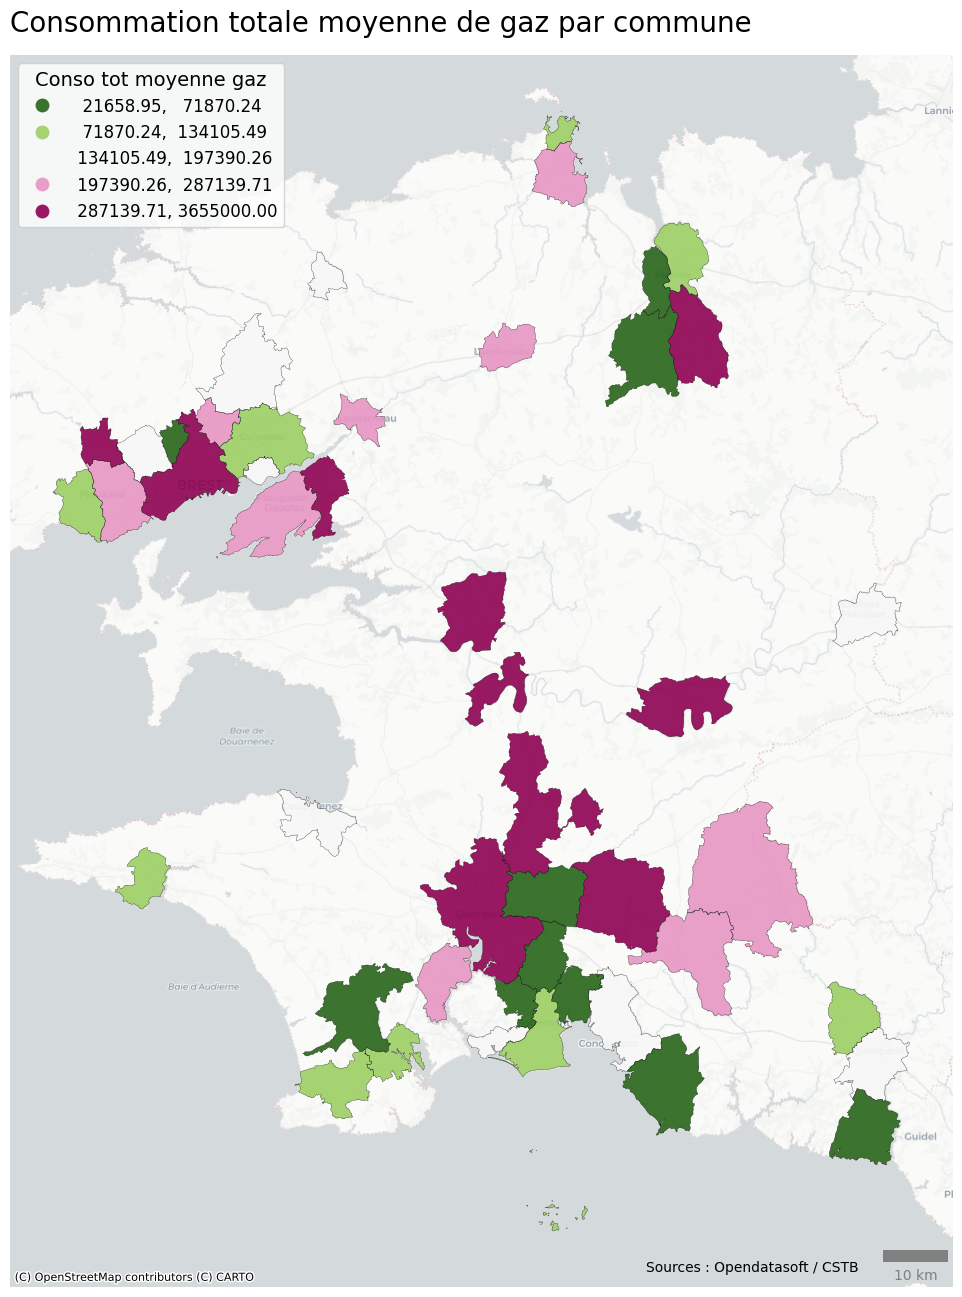

In [ ]:
#Transformation du dataframe en geodataframe
gaz_f = gpd.GeoDataFrame(gaz_f, geometry='geometry')

# Mise en place de la carte de la conso moyenne de gaz
fig, ax = plt.subplots(figsize=(18,16))

gaz_f.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.2, color = 'black')
gaz_f.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.6, column='conso_tot', cmap='PiYG_r', scheme='quantiles', alpha=0.9, 
                                    legend=True, legend_kwds={'title': "Conso tot moyenne gaz", 'loc': 'upper left', 'title_fontsize':14, 'fontsize':12})
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

ax.axis("off")
plt.title('Consommation totale moyenne de gaz par commune', loc='left', fontsize=20)
ax.text(0.90, 0.01, 'Sources : Opendatasoft / CSTB', verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, color='black', fontsize=10)
ax.add_artist(ScaleBar(1, length_fraction=0.1, location = "lower right", box_alpha=0, color="grey"))

plt.show()

# Hauteur moyenne des batiments en construction par commune

In [ ]:
#Import du fichier trié
bat_construction = df_filled['bat_construction']
bat_construction.head(2)

WKT  \
0  MULTIPOLYGON (((185942.0 6867438.1,185944.8 68...   
1  MULTIPOLYGON (((171764.9 6789694.5,171788.3 67...   

     batiment_construction_id              batiment_groupe_id  \
0  BATIMENT0000000023314998-1  29239000AT0511_bf1869a89bc2d61   
1  BATIMENT0000000023622565-1  uf292320406644_b715a427485db9e   

  code_departement_insee  code_iris code_commune_insee  s_geom_cstr  hauteur  \
0                     29  292390000              29239       4109.0      4.7   
1                     29  292320103              29232        208.0      3.0   

   altitude_sol  fictive_geom_cstr  \
0          37.6              False   
1           8.0              False   

                                            geometry  
0  MULTIPOLYGON (((185942.000 6867438.100, 185944...  
1  MULTIPOLYGON (((171764.900 6789694.500, 171788...

Réalisation d'une carte des Hauteur moyenne des batiments en construction par commune dans le Finistère

In [ ]:
# Jointure spatiale entre bat_construction et CommunesOK
Res = pd.merge(bat_construction, Communes29, left_on='code_commune_insee', right_on='com_code', how='inner')
Res.head(2)

WKT  \
0  MULTIPOLYGON (((185942.0 6867438.1,185944.8 68...   
1  MULTIPOLYGON (((186727.4 6869880.5,186718.9 68...   

     batiment_construction_id              batiment_groupe_id  \
0  BATIMENT0000000023314998-1  29239000AT0511_bf1869a89bc2d61   
1  BATIMENT0000000023312556-1  29239000AB0668_0a20e6fd40399dc   

  code_departement_insee  code_iris code_commune_insee  s_geom_cstr  hauteur  \
0                     29  292390000              29239       4109.0      4.7   
1                     29  292390000              29239         48.0      3.5   

   altitude_sol  fictive_geom_cstr  \
0          37.6              False   
1           5.6              False   

                                          geometry_x  year reg_code  reg_name  \
0  MULTIPOLYGON (((185942.000 6867438.100, 185944...  2022       53  Bretagne   
1  MULTIPOLYGON (((186727.400 6869880.500, 186718...  2022       53  Bretagne   

  dep_code   dep_name com_code com_name  \
0       29  Finistère    29239  Roscoff   
1       29  Finistère    29239  Roscoff   

                                        geo_point_2d  \
0  {'lon': -3.9886862446907236, 'lat': 48.7119708...   
1  {'lon': -3.9886862446907236, 'lat': 48.7119708...   

                                          geometry_y  
0  MULTIPOLYGON (((-3.98776 48.73172, -3.98772 48...  
1  MULTIPOLYGON (((-3.98776 48.73172, -3.98772 48...

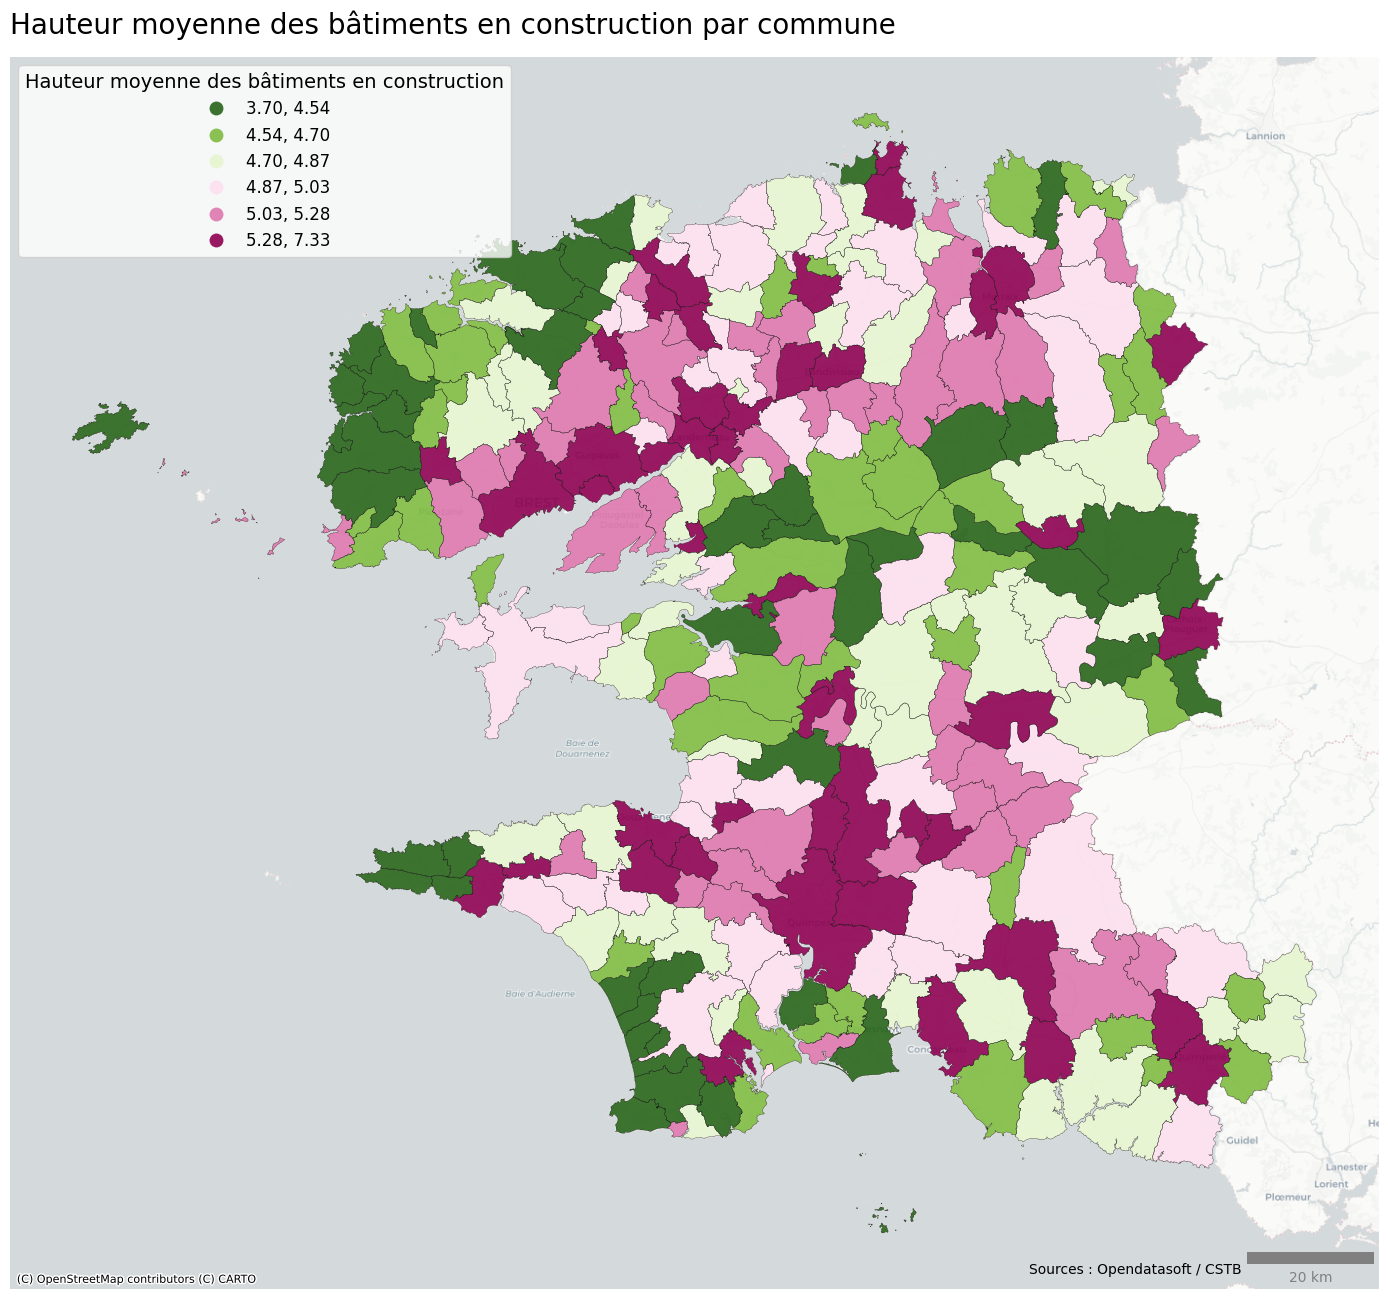

In [ ]:
# Calculer la hauteur moyenne des bâtiments par commune
hauteur_moyenne = Res.groupby('code_commune_insee')['hauteur'].mean()

# Fusionner la hauteur moyenne par commune avec la table "Communes29"
Communes_hauteur = pd.merge(Communes29, hauteur_moyenne, left_on='com_code', right_index=True)

# Mise en place de la carte
Carte, ax = plt.subplots(figsize=(18,16))

Communes_hauteur.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.2, color = 'black')
Communes_hauteur.to_crs('EPSG:3857').plot(ax=ax, k=6, column='hauteur', cmap='PiYG_r',scheme='quantiles', alpha=0.9, 
                                    legend=True, legend_kwds={'title': "Hauteur moyenne des bâtiments en construction", 'loc': 'upper left', 'title_fontsize':14, 'fontsize':12})
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

ax.axis("off")
plt.title('Hauteur moyenne des bâtiments en construction par commune', loc='left', fontsize=20)
ax.text(0.90, 0.01, 'Sources : Opendatasoft / CSTB', verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, color='black', fontsize=10)
ax.add_artist(ScaleBar(1, length_fraction=0.1, location = "lower right", box_alpha=0, color="grey"))

plt.show()

In [ ]:
#Enregistrer la carte en svg
Carte.savefig("HauteurMoy.svg")

Graphique du Top 10 des communes avec la hauteur moyenne de bâtiment en construction la plus élevée

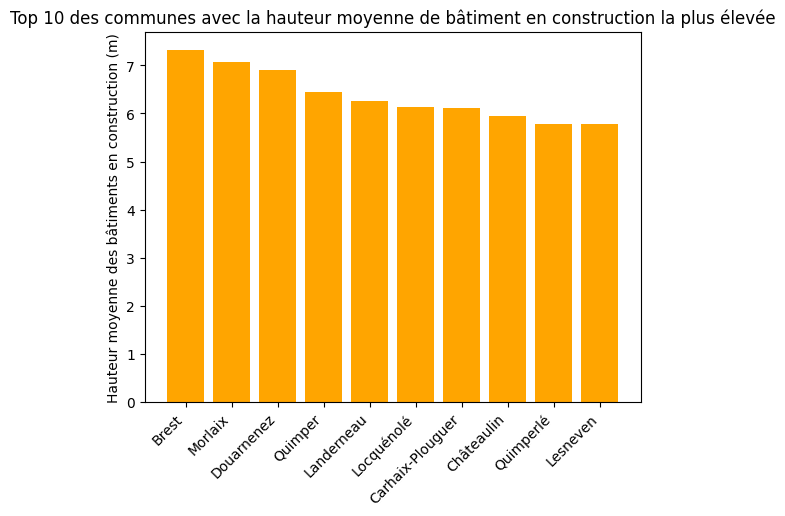

In [ ]:
# Calculer la hauteur moyenne des bâtiments en construction par commune
hauteur_moy = Res.groupby('com_name')['hauteur'].mean()

# sélection des 10 communes avec la plus haute hauteur moyenne
hauteur_moy = hauteur_moy.sort_values(ascending=False)[:10] 

# Créer un graphique en barres
fig, ax = plt.subplots()
ax.bar(hauteur_moy.index, hauteur_moy, color='orange')
ax.set_xticks(range(len(hauteur_moy)))
ax.set_xticklabels(hauteur_moy.index, rotation=45, ha='right')
ax.set_ylabel('Hauteur moyenne des bâtiments en construction (m)')
ax.set_title('Top 10 des communes avec la hauteur moyenne de bâtiment en construction la plus élevée')
plt.show()